In [ ]:
#! unzip "/content/drive/MyDrive/dog-breed-identification.zip" -d "/content/drive/MyDrive/Colab Notebooks/Dogvision/"

## end to end multiclass dog breed classification
This notebook builds an end to end multiclass image classifier using TensorFlow 2.0 and Tensorflow Hub
##1.problem
identify breed of a dog given an image of the dog.
When am sitting at caffe and i take photo of a dog i want to know what dog breed it is.
##2.Data
The data we are using is from kaggle's dog breed identification competition
https://www.kaggle.com/c/dog-breed-identification/data

##3.evaluation
the prediction are evaluated using **Multi Class Log Loss** between the  actual and predicted data
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation
## 4.Features
some information about the data
* we are dealing with images(unstructured data) so its probably best we use deep learning/transfer learning.
* There are 120 breeds of dog meaning there are 120 classes.
* There are around 10,000+ images in the training set .
* There are round 10,000+ plus images in the test set(these images have no labels because we want to predict them)


## Get Our workspace ready

In [ ]:
## Get Our workspace ready
##import tensor flow imto colab
import tensorflow as tf
print("TF version:",tf.__version__)

TF version: 2.15.0


In [ ]:
# import TF 2.x
#try:
  #%tensorflow_varsion only exist in colab
#except Exception:
  #pass

In [ ]:
##lets import tensor flow hub
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:",tf.__version__)
print("TF HUB version:",hub.__version__)

TF version: 2.15.0
TF HUB version: 0.16.1


In [ ]:
# check for gpu availability
print("CPU","available(YESSSS!!!!!)" if tf.config.list_physical_devices("CPU") else"not available")

CPU available(YESSSS!!!!!)


## Getting our data ready turning it into tensors
with all machine learning models our data must be in numerical format.turning our images into numerical representation
**lets start by accessing our data and checking out labels**


In [ ]:

# check out labels of our data
import pandas as pd
labels_csv=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dogvision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

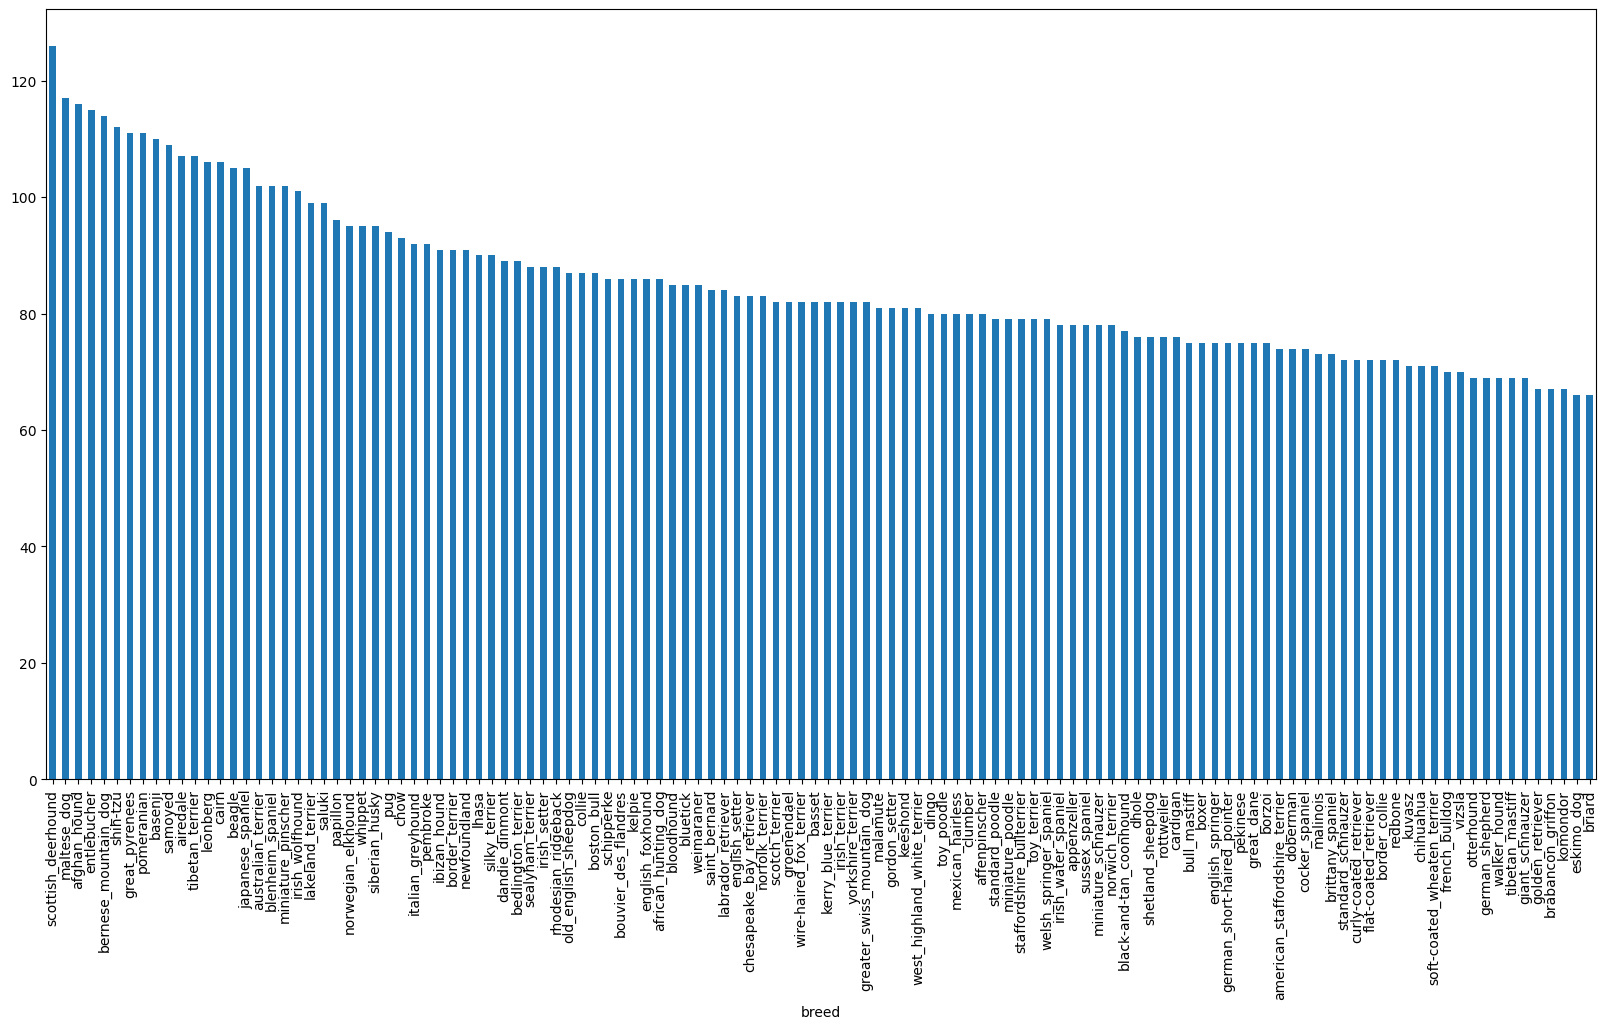

In [ ]:
#how many images are there of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

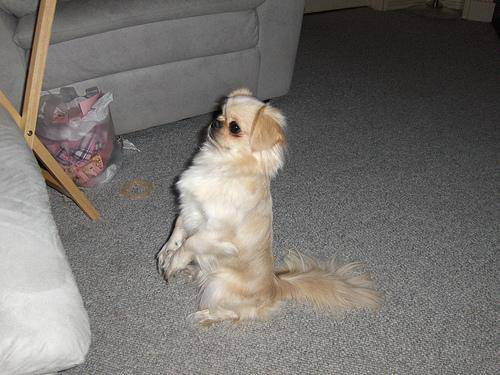

In [ ]:
# lets view an image using Ipython
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/Dogvision/train/001cdf01b096e06d78e9e5112d419397.jpg")

## getting image and their labels
lets get a list of our image filepathnames

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
filenames=["/content/drive/MyDrive/Colab Notebooks/Dogvision/train/"+ fname + ".jpg" for fname in labels_csv["id"]]

In [ ]:
filenames[:14]

['/content/drive/MyDrive/Colab Notebooks/Dogvision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 '/content/drive/MyDrive/Colab Notebooks

In [ ]:
import os
os.listdir("/content/drive/MyDrive/Colab Notebooks/Dogvision/train/")[:10]

['e7ab11f849e895ced3cdddf4d90e5bd2.jpg',
 'e7ab74acdc860dfb93271901da085ffd.jpg',
 'e7af30693df78697b8541fb5e2e46941.jpg',
 'e7af8f590b4fbdca0779f5e606ef91a1.jpg',
 'e7bc17ef352ef576b73467ebe9a407f1.jpg',
 'e7c5692d044250d303a839d989132bf1.jpg',
 'e7f2f67cb616281a89fc77a6bdea6eb0.jpg',
 'e7f3274adaad369068602a422e9df192.jpg',
 'e7f491cb903ff0a294eb63c625ef090e.jpg',
 'e7f4f3c25291884f2dfe7c60051d6949.jpg']

In [ ]:
import os
if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Dogvision/train/"))==len(filenames):
  print("Filenames match actual amount of files!!! proceed")
else:
  print(" file names do not match actual amount of files,check file directory")

Filenames match actual amount of files!!! proceed


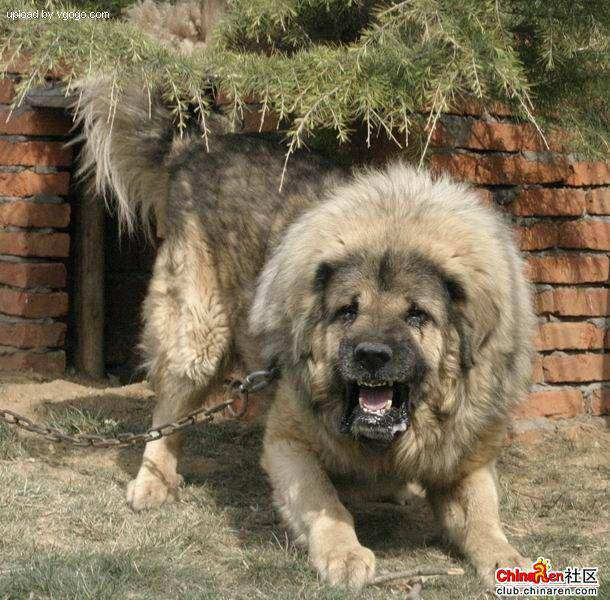

In [ ]:
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
#since we have now got our training image filepaths in a list let's prepare our labels
import numpy as np

labels=labels_csv["breed"].to_numpy()
#labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
## check of number of labels matches number of filenames

In [ ]:
if len(labels)==len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("number of labels does not match number of filenames check data directories")


Number of labels matches number of filenames


In [ ]:
#find the unique lable values
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
#turn a single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
#turning boolean arrays into integers
print(labels[0])#original label
print(np.where(unique_breeds==labels[0]))#index where label occurs
print(boolean_labels[0].argmax())#index where label occurs in aa boolean array
print(boolean_labels[0].astype(int))# there will be a 1 where sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
#setup x and y variables
X=filenames
y=boolean_labels

In [ ]:
len(filenames)

10222

we will start with a 1000 images and increase as needed

In [ ]:
# set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:10000,step=1000}

In [ ]:
#lets split our data into train and validation sets
from sklearn.model_selection import train_test_split
#split them into training and validation of total size NUM_IMAGES
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)
len(X_train),len(y_train),len(X_val),len(y_val)


(800, 800, 200, 200)

In [ ]:
# let's have a geez at the training data
X_train[:5],y_train[:5]

(['/content/drive/MyDrive/Colab Notebooks/Dogvision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Dogvision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         F

#preprocessng images(turning images into tensors)
To procces our images into tensors we are going yto use a function which does a few things:
** 1.Take an image filepath as input** ,
**2.use tensor flow to read file and save it to a variable,'image'**
**3.Turn our 'image'(a jpg) into tensors**
**4.Resize the 'image' to be a shape (224,224)**
**5.Return the modified 'image'**

In [ ]:
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(),image.min()

(255, 0)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
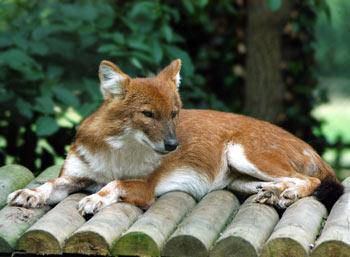

In [ ]:
image

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

## Now we've seen what an immage looks like is tensor,lets make a function to preprocess them.
** 1.Take an image filepath as input** ,
**2.use tensor flow to read file and save it to a variable,'image'**
**3.Turn our 'image'(a jpg) into tensors**
**4.Normalize our image (convert color channel from 0-255 to 0-1)**
**4.Resize the 'image' to be a shape (224,224)**
**5.Return the modified 'image'**

In [ ]:
# Define image size
IMG_SIZE=224
def preprocess_image(image_path,image_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor
  """
  #read in an image file
  image=tf.io.read_file(image_path)
  # turn the jpeg image into numerical tensor with 3 colour channnels(RED<GREEN<BLUE)
  image=tf.image.decode_jpeg(image,channels=3)
  #Convert the colour channel values from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image,tf.float32)
  #Resize our image to our desired value(224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image



In [ ]:
tensor=tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [ ]:
tf.image.decode_jpeg(tensor,channels=3)

<tf.Tensor: shape=(500, 375, 3), dtype=uint8, numpy=
array([[[ 59,  68,  65],
        [ 64,  73,  70],
        [ 71,  80,  77],
        ...,
        [115, 128, 108],
        [115, 128, 108],
        [110, 123, 103]],

       [[ 65,  74,  71],
        [ 72,  81,  78],
        [ 79,  88,  85],
        ...,
        [114, 127, 107],
        [117, 130, 110],
        [116, 129, 109]],

       [[ 68,  77,  74],
        [ 76,  85,  82],
        [ 83,  92,  89],
        ...,
        [114, 127, 107],
        [120, 133, 113],
        [123, 136, 116]],

       ...,

       [[173, 200, 155],
        [164, 179, 136],
        [181, 166, 133],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[142, 159, 117],
        [147, 154, 113],
        [189, 174, 141],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[167, 179, 139],
        [167, 172, 132],
        [204, 188, 155],
        ...,
        [255, 255, 25

## turning data into batches
Why turn our data into batches?
lets say your are trying to proccess 10000+ images in a go...they all might not fit into memory.
so thats why we do about 32(this is the batch size) images at a time(you can mannually adjust the batch size if need be.)
In order to use TensorFLow effectivelly we need our data in form of tensor tupples whichn look like this'(image,label)'


In [ ]:
#create a simple function to return a tupple of tensors
def get_image_label(image_path,label):
  """
  takes an image filepath name and the associated label
  proccesses the image and return a tupple of (image,label)
  """
  image=preprocess_image(image_path)
  return image,label


In [ ]:
(preprocess_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way our data into tuple of tensors inthe form (image,label)
lets make a function to turn our data X and Y into batches

In [ ]:
#Define the batch size=32 is a goood start
BATCH_SIZE=32
#create a function to turn our data into batches
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  create batches of data out of image(X)  and label(y) pairs.
  shuffles the data if its training data but doesnt shuffle if its validation data
  also accepts test data as input(no labels).
  """
  if test_data:
    print("creating test data batche.....s")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))#only filepaths (no labels)
    data_batch=data.map(preprocess_image).batch(BATCH_SIZE)
    return data_batch
#if the data is a valid dataset we dont need to shuffle it
  elif valid_data:
    print("Crerating validation batches... ")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),#file paths
                                             tf.constant(y)))#labels
    data_batch=data.map(preprocess_image).batch(BATCH_SIZE)
    return data_batch
 else:
      print("Creating training data batches...")
      #turn file paths and labels into Tensors21
      data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
      #shufflimng path names and labels before mapping imaage proccessor function is faster than




